In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

# Logistic Regressoin

In [99]:
from sklearn.linear_model import LogisticRegression, SGDClassifier

pass_time = [8,7,8,9,7,6,10,13,12,5,7,16,12,8,6,10]
fail_time = [1,2,3,4,1,3,4,2,5,6,8,2,4,1,2,9]
len(pass_time)

16

In [100]:
x = np.hstack((pass_time, fail_time))
x

array([ 8,  7,  8,  9,  7,  6, 10, 13, 12,  5,  7, 16, 12,  8,  6, 10,  1,
        2,  3,  4,  1,  3,  4,  2,  5,  6,  8,  2,  4,  1,  2,  9])

In [101]:
y0 = [0] * len(fail_time)
y1 = [1] * len(pass_time)

y = np.hstack((y1,y0))
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

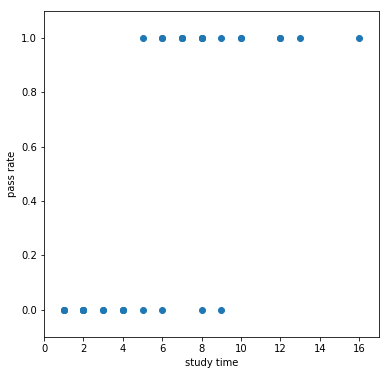

In [102]:
fig = plt.figure(figsize=(6,6))
plt.xlim(0,17)
plt.ylim(-0.1, 1.1)
plt.xlabel('study time')
plt.ylabel('pass rate')
plt.scatter(x,y)
plt.show()

In [103]:
model = LogisticRegression()
model.fit(x.reshape(-1,1),y)

/Users/Dodanto/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [104]:
print(model.coef_, model.intercept_)

[[0.37610712]] [-1.95823904]


In [105]:
model.predict(np.array([6.9]).reshape(-1,1)), model.predict(np.array([5]).reshape(-1,1))

(array([1]), array([0]))

In [106]:
model.predict_proba(np.array([6.9]).reshape(-1,1)), model.predict_proba(np.array([5]).reshape(-1,1))

(array([[0.34594761, 0.65405239]]), array([[0.51941609, 0.48058391]]))

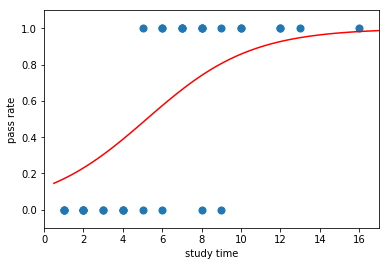

In [107]:
def logreg(z):
    return 1/(1 + np.exp(-z))

fig = plt.figure(figsize=(6,4))
plt.xlim(0,17)
plt.ylim(-0.1, 1.1)
plt.xlabel('study time')
plt.ylabel('pass rate')
plt.scatter(x,y,s=50)

xx = np.linspace(0.5,17,100)
yy = logreg(model.coef_*xx + model.intercept_)[0]

plt.plot(xx,yy,c='r')

plt.show()

In [108]:
# Logistic regression with dataset (maybe from kaggle)
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold
from sklearn import metrics

In [109]:
data = pd.read_csv('data/breast_cancer.csv')
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [110]:
data.head().T

,0,1,2,3,4
id,842302,842517,84300903,84348301,84358402
diagnosis,M,M,M,M,M
radius_mean,17.99,20.57,19.69,11.42,20.29
texture_mean,10.38,17.77,21.25,20.38,14.34
perimeter_mean,122.8,132.9,130,77.58,135.1
area_mean,1001,1326,1203,386.1,1297
smoothness_mean,0.1184,0.08474,0.1096,0.1425,0.1003
compactness_mean,0.2776,0.07864,0.1599,0.2839,0.1328
concavity_mean,0.3001,0.0869,0.1974,0.2414,0.198
concave points_mean,0.1471,0.07017,0.1279,0.1052,0.1043


In [111]:
data['diagnosis'] = data['diagnosis'].map({'M':1, 'B':0})
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [112]:
features = ['radius_mean']
x = data[features]
y = data['diagnosis']

np.random.seed(51)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size =0.2)
model = LogisticRegression()
model.fit(x_train, y_train)
model.score(x_test, y_test)

/Users/Dodanto/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8771929824561403

In [113]:
features = ['texture_mean']
x = data[features]
y = data['diagnosis']

np.random.seed(51)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size =0.2)
model = LogisticRegression()
model.fit(x_train, y_train)
model.score(x_test, y_test)

/Users/Dodanto/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.7192982456140351

In [114]:
features = ['texture_mean', 'radius_mean']
x = data[features]
y = data['diagnosis']

np.random.seed(51)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size =0.2)
model = LogisticRegression()
model.fit(x_train, y_train)
model.score(x_test, y_test)

/Users/Dodanto/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8947368421052632

In [167]:
x = data.drop('diagnosis',axis=1).drop('id',axis=1)
y = data['diagnosis']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size =0.2)
model = LogisticRegression()
model.fit(x_train, y_train)
model.score(x_test, y_test)

/Users/Dodanto/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.956140350877193

In [164]:
# 모든 데이터, 그리고 다른 알고리즘들
x = data.drop('diagnosis',axis=1).drop('id',axis=1)
y = data['diagnosis']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size =0.2)
model = SGDClassifier()
model.fit(x_train, y_train)
model.score(x_test, y_test)

/Users/Dodanto/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


0.9298245614035088

In [117]:
from sklearn.neighbors import KNeighborsClassifier

for i in range(1,21,2):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    print("K= ", i, "--> score: ", knn.score(x_test, y_test))

K=  1 --> score:  0.9035087719298246
K=  3 --> score:  0.9122807017543859
K=  5 --> score:  0.8947368421052632
K=  7 --> score:  0.8947368421052632
K=  9 --> score:  0.8947368421052632
K=  11 --> score:  0.9122807017543859
K=  13 --> score:  0.9122807017543859
K=  15 --> score:  0.9122807017543859
K=  17 --> score:  0.9122807017543859
K=  19 --> score:  0.9122807017543859


In [161]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.9122807017543859

In [149]:
from sklearn.ensemble import RandomForestClassifier

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size =0.2)
model = RandomForestClassifier(n_estimators=1000)
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.9824561403508771

In [173]:
# softmax 함수 연습 - multiclass

score = [-1, -0.5, 1.0, 1.5, 2.7]
prob = []
sum = 0
for i in range(len(score)):
    prob.append(np.exp(score[i]))
    sum = sum + np.exp(score[i])
    
prob = prob/sum
prob.round(2)

array([0.02, 0.03, 0.12, 0.19, 0.65])